In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [32]:
import seaborn as sns
sns.set()

/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
jeopardy_pd = pd.read_csv('JEOPARDY_CSV.csv', index_col=False, encoding='windows-1251')
jeopardy_pd.shape

(216930, 7)

In [3]:
jeopardy_pd.head()

,Show_Number,Air_Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/04,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/04,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
len(jeopardy_pd.Category.unique())

27983

In [77]:
popular_threshod = 200
popular_categories = jeopardy_pd.Category.value_counts() > popular_threshod
popular_categories = popular_categories[popular_categories]
popular_categories = list(popular_categories.index)

In [95]:
most_popular_threshod = 400
most_popular_categories = jeopardy_pd.Category.value_counts() > most_popular_threshod
most_popular_categories = most_popular_categories[most_popular_categories]
most_popular_categories = list(most_popular_categories.index)
len(most_popular_categories)

5

In [78]:
jeopardy_pd = jeopardy_pd[jeopardy_pd.Category.isin(popular_categories)]
len(jeopardy_pd.Category.unique())

61

In [163]:
ax_all_jeopardy_pd = jeopardy_pd.Category.value_counts().plot.bar(figsize=(20, 8))
plt.title('All rounds')

Text(0.5,1,'All rounds')

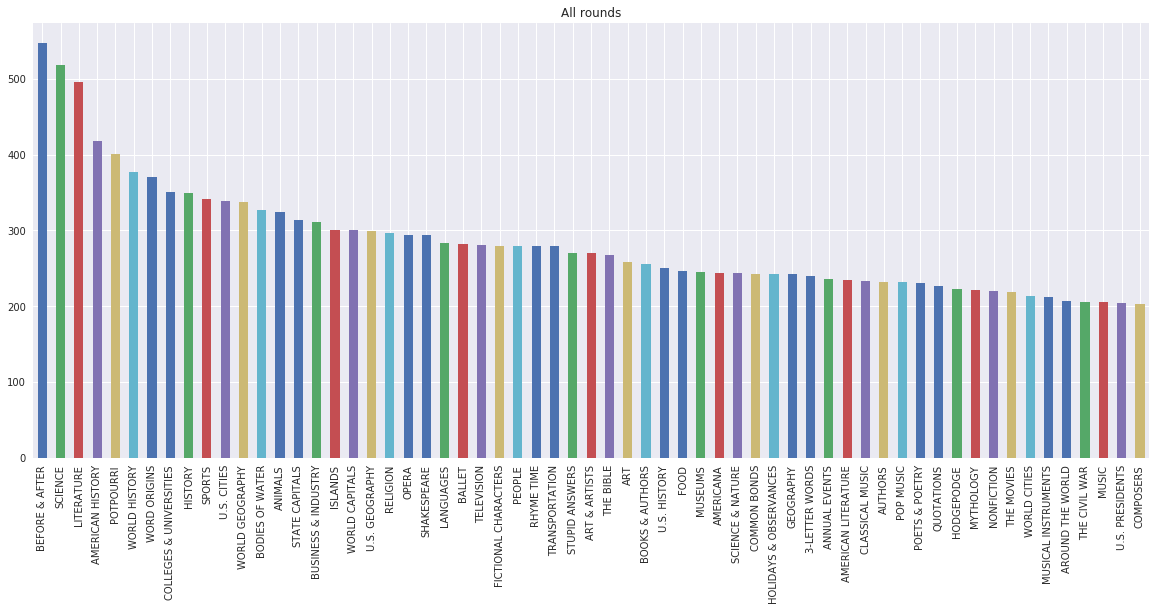

In [164]:
plt.show()

In [158]:
jeopardy_pd.Round.unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!'], dtype=object)

In [165]:
category_name = 'Jeopardy!'
print(len(jeopardy_pd[jeopardy_pd.Round == category_name].Category.unique()))
ax_all_jeopardy_pd = jeopardy_pd[jeopardy_pd.Round == category_name].Category.value_counts().plot.bar(figsize=(20, 8))
plt.title('Jeopardy!')

61


Text(0.5,1,'Jeopardy!')

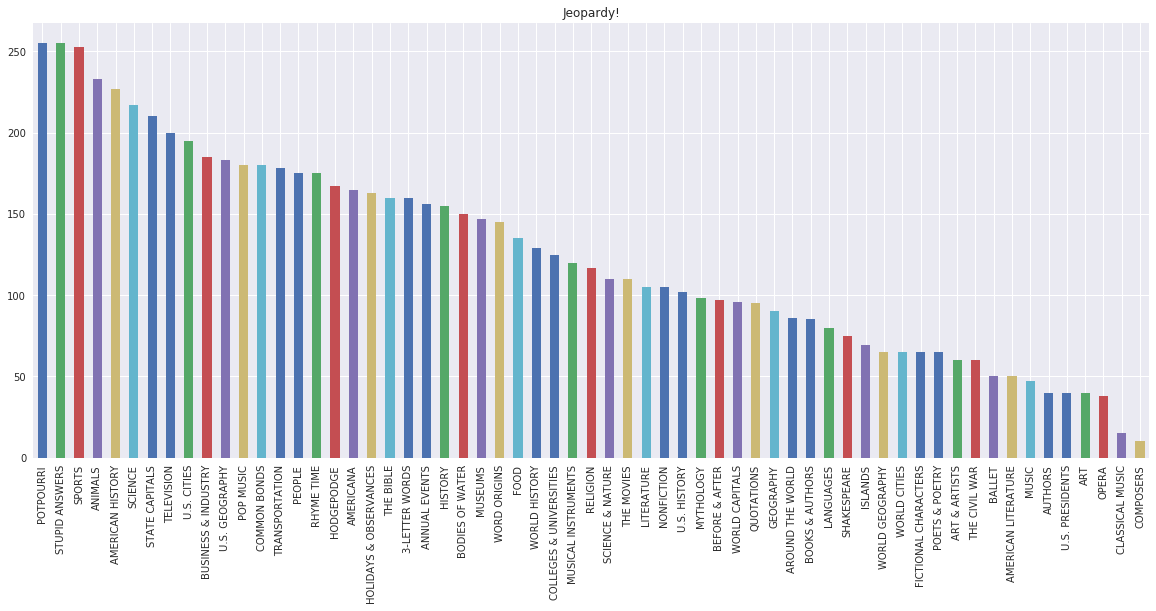

In [166]:
plt.show()

In [167]:
category_name = 'Double Jeopardy!'
print(len(jeopardy_pd[jeopardy_pd.Round == category_name].Category.unique()))
ax_all_jeopardy_pd = jeopardy_pd[jeopardy_pd.Round == category_name].Category.value_counts().plot.bar(figsize=(20, 8))
plt.title('Double Jeopardy!')

61


Text(0.5,1,'Double Jeopardy!')

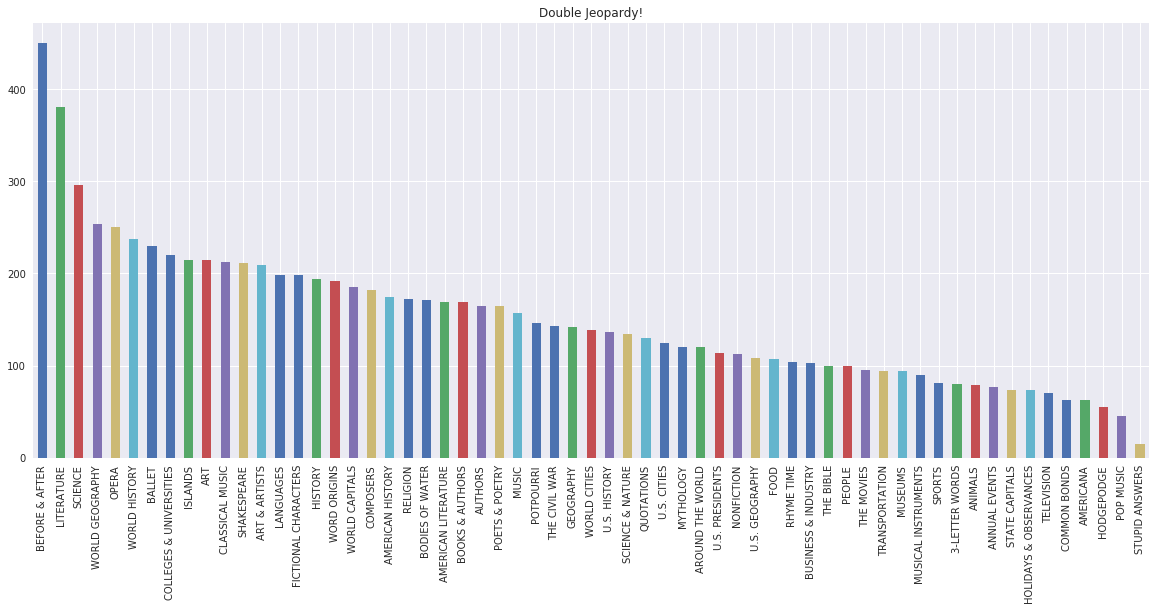

In [168]:
plt.show()

In [171]:
category_name = 'Final Jeopardy!'
print(len(jeopardy_pd[jeopardy_pd.Round == category_name].Category.unique()))
ax_all_jeopardy_pd = jeopardy_pd[jeopardy_pd.Round == category_name].Category.value_counts().plot.bar(figsize=(20, 8))
plt.title('Final Jeopardy!')

52


Text(0.5,1,'Final Jeopardy!')

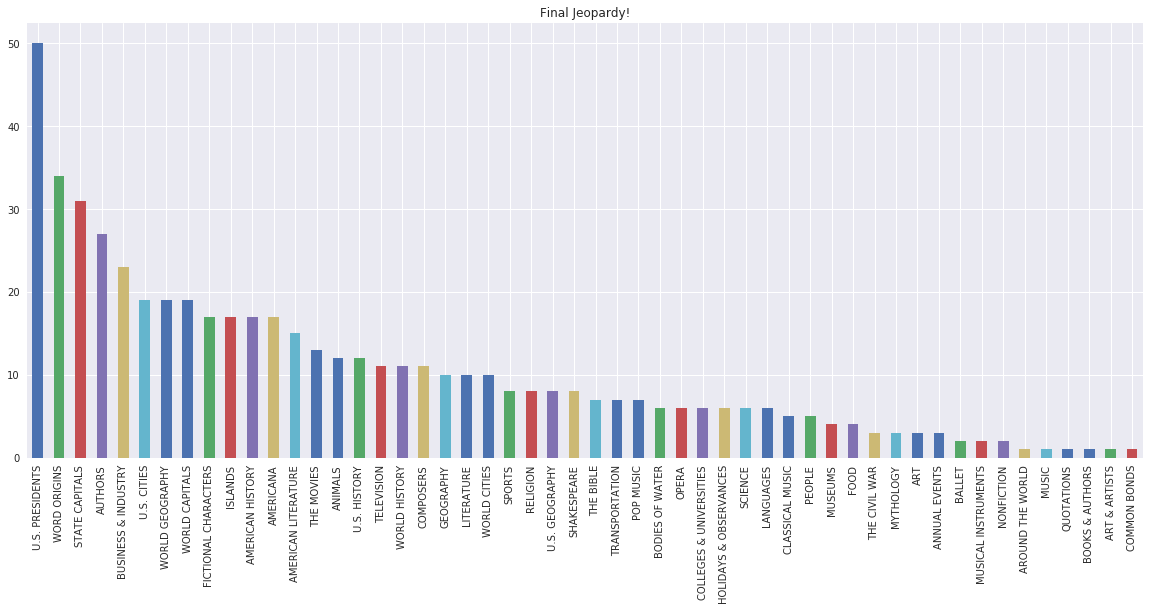

In [172]:
plt.show()

In [42]:
rounds = ['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!']
category_rouds_dict = {}
for category_name, category_group in jeopardy_pd.groupby(['Category']):
    category_rouds_dict[category_name] = []
    for round_name in rounds:
        category_rouds_dict[category_name].append(sum(category_group.Round == round_name))

In [48]:
import plotly.express as px
import plotly.graph_objects as go

In [53]:
# fig = go.Figure()
# for category_name in category_rouds_dict:
#     fig.add_trace(go.Scatter(x=[0, 1, 2], y=category_rouds_dict[category_name],
#                         mode='lines+markers',
#                         name=category_name))
# fig.show()

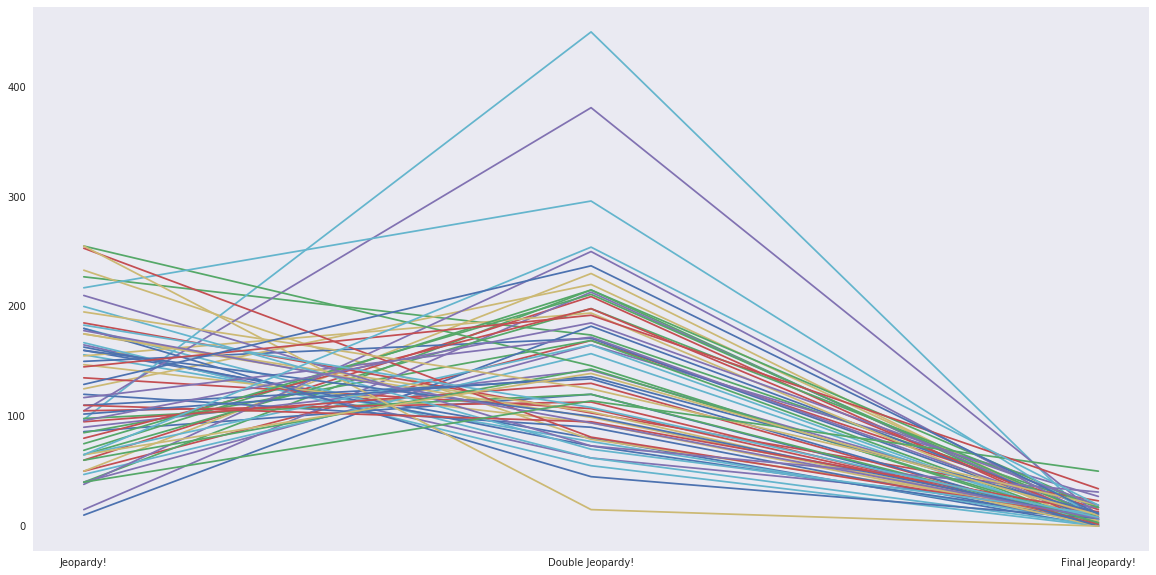

In [56]:
plt.figure(figsize=(20, 10))
for category_name in category_rouds_dict:
    plt.plot([0, 1, 2], category_rouds_dict[category_name], label=category_name)

plt.xticks([0, 1, 2], rounds)
plt.grid()
plt.show()

In [64]:
import datetime

In [58]:
jeopardy_pd.Air_Date.min(), jeopardy_pd.Air_Date.max()

('1/1/01', '9/9/99')

In [68]:
def date_normalization(date_str):
    month, day, year = list(map(lambda x: int(x), date_str.split('/')))
    if int(year) > 30:
        year += 1900
    else:
        year += 2000
    return datetime.date(year, month, day)

In [71]:
jeopardy_pd['date'] = jeopardy_pd.Air_Date.apply(date_normalization)

In [72]:
jeopardy_pd.date.min(), jeopardy_pd.date.max()

(datetime.date(1984, 9, 10), datetime.date(2012, 1, 27))

In [80]:
results = []
for date, date_group in jeopardy_pd.groupby('date'):
    result = [date]
    for category_name in popular_categories:
        result.append(sum(date_group.Category == category_name))
    results.append(result)

In [84]:
category_date_pd = pd.DataFrame(results, columns=['date', *popular_categories]).set_index('date')

In [88]:
category_date_pd

,BEFORE & AFTER,SCIENCE,LITERATURE,AMERICAN HISTORY,POTPOURRI,WORLD HISTORY,WORD ORIGINS,COLLEGES & UNIVERSITIES,HISTORY,SPORTS,...,MYTHOLOGY,NONFICTION,THE MOVIES,WORLD CITIES,MUSICAL INSTRUMENTS,AROUND THE WORLD,THE CIVIL WAR,MUSIC,U.S. PRESIDENTS,COMPOSERS
date,,,,,,,,,,,,,,,,,,,,,
1984-09-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984-09-11,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1984-09-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984-09-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
1984-09-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984-09-20,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984-09-21,0,0,5,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
1984-09-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1984-09-25,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,5,0,0


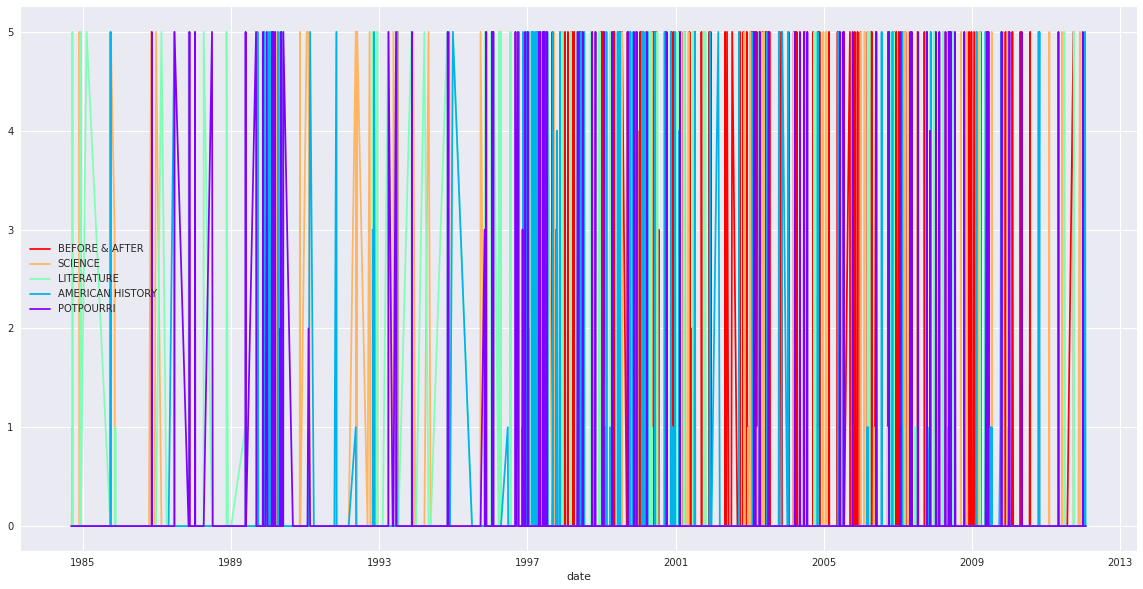

In [113]:
category_date_pd[most_popular_categories].plot(figsize=(20, 10), colormap='rainbow_r')
plt.show()

In [118]:
len(jeopardy_pd[jeopardy_pd.Category == 'SCIENCE'])

519

In [132]:
popular_categories

['BEFORE & AFTER',
 'SCIENCE',
 'LITERATURE',
 'AMERICAN HISTORY',
 'POTPOURRI',
 'WORLD HISTORY',
 'WORD ORIGINS',
 'COLLEGES & UNIVERSITIES',
 'HISTORY',
 'SPORTS',
 'U.S. CITIES',
 'WORLD GEOGRAPHY',
 'BODIES OF WATER',
 'ANIMALS',
 'STATE CAPITALS',
 'BUSINESS & INDUSTRY',
 'ISLANDS',
 'WORLD CAPITALS',
 'U.S. GEOGRAPHY',
 'RELIGION',
 'OPERA',
 'SHAKESPEARE',
 'LANGUAGES',
 'BALLET',
 'TELEVISION',
 'FICTIONAL CHARACTERS',
 'PEOPLE',
 'RHYME TIME',
 'TRANSPORTATION',
 'STUPID ANSWERS',
 'ART & ARTISTS',
 'THE BIBLE',
 'ART',
 'BOOKS & AUTHORS',
 'U.S. HISTORY',
 'FOOD',
 'MUSEUMS',
 'AMERICANA',
 'SCIENCE & NATURE',
 'COMMON BONDS',
 'HOLIDAYS & OBSERVANCES',
 'GEOGRAPHY',
 '3-LETTER WORDS',
 'ANNUAL EVENTS',
 'AMERICAN LITERATURE',
 'CLASSICAL MUSIC',
 'AUTHORS',
 'POP MUSIC',
 'POETS & POETRY',
 'QUOTATIONS',
 'HODGEPODGE',
 'MYTHOLOGY',
 'NONFICTION',
 'THE MOVIES',
 'WORLD CITIES',
 'MUSICAL INSTRUMENTS',
 'AROUND THE WORLD',
 'THE CIVIL WAR',
 'MUSIC',
 'U.S. PRESIDENTS',
 'C

In [133]:
jeopardy_pd[jeopardy_pd.Category == 'SPORTS'].Answer.str.lower().value_counts()

golf                                               6
basketball                                         4
los angeles dodgers                                4
bowling                                            4
wayne gretzky                                      3
michael jordan                                     3
george foreman                                     3
dan marino                                         3
detroit red wings                                  3
tennis                                             3
mario lemieux                                      3
figure skating                                     2
new jersey devils                                  2
steffi graf                                        2
bobby jones                                        2
jack nicklaus                                      2
hakeem olajuwon                                    2
the america's cup                                  2
ice hockey                                    

In [150]:
from wordcloud import WordCloud, STOPWORDS

In [178]:
wc = WordCloud(width=1000, height=500, stopwords=set(list(STOPWORDS) + ['one', '_blank']))

In [179]:
all_text = ' '.join(list(jeopardy_pd.Question))

In [180]:
wc.generate_from_text(all_text)

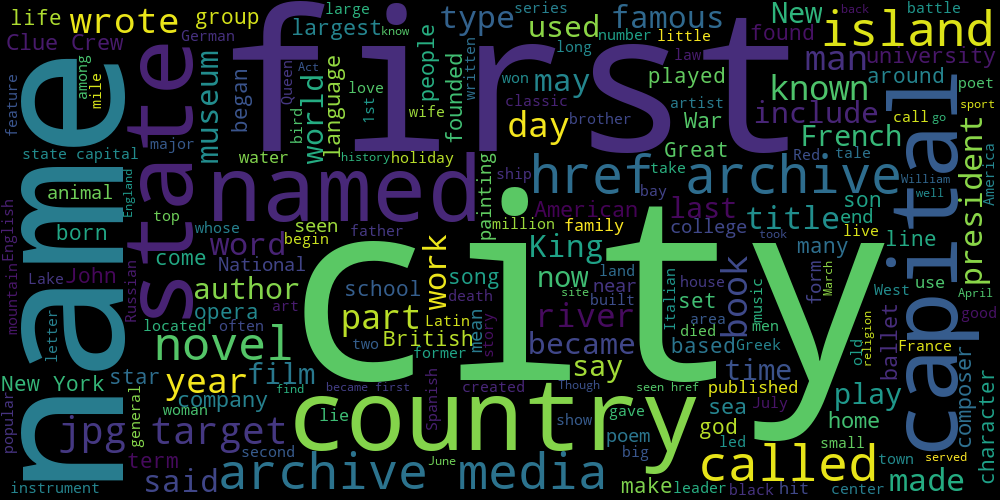

In [181]:
wc.to_image()

In [182]:
most_popular_categories

['BEFORE & AFTER', 'SCIENCE', 'LITERATURE', 'AMERICAN HISTORY', 'POTPOURRI']

In [183]:
jeopardy_pd[jeopardy_pd.Category == 'BEFORE & AFTER']

,Show_Number,Air_Date,Round,Category,Value,Question,Answer,date
3557,4576,6/28/04,Double Jeopardy!,BEFORE & AFTER,$400,1980 scarefest in which mom & daughter switch ...,Freaky Friday the 13th,2004-06-28
3563,4576,6/28/04,Double Jeopardy!,BEFORE & AFTER,$800,Leif Ericson's dad who was a huge star with lo...,Erik the Red Giant,2004-06-28
3569,4576,6/28/04,Double Jeopardy!,BEFORE & AFTER,"$1,200",Fictional girl sleuth who's the granddaughter ...,Nancy Drew Barrymore,2004-06-28
3575,4576,6/28/04,Double Jeopardy!,BEFORE & AFTER,"$1,600",Projection at the southern tip of South Americ...,Cape Horn o' Plenty,2004-06-28
3581,4576,6/28/04,Double Jeopardy!,BEFORE & AFTER,"$2,000","""Lethal Weapon"" director whose group was caugh...",the Richard Donner Party,2004-06-28
5515,5173,2/21/07,Jeopardy!,BEFORE & AFTER,$200,"""Thin"" piece of disputed Israeli-Palestinian l...",Gaza Strip Poker,2007-02-21
5521,5173,2/21/07,Jeopardy!,BEFORE & AFTER,$400,Film legend who became an 1823 edict against E...,the Marilyn Monroe Doctrine,2007-02-21
5527,5173,2/21/07,Jeopardy!,BEFORE & AFTER,$600,"""Bouncy"" 1965 Beatles album that took over for...",Rubber Soul Train,2007-02-21
5533,5173,2/21/07,Jeopardy!,BEFORE & AFTER,"$1,000","Robert E. Lee's ""right arm"" general who sang ""...",Stonewall Jackson 5,2007-02-21
5539,5173,2/21/07,Jeopardy!,BEFORE & AFTER,"$1,000","1935 ""lunar"" Florida song that turned into an ...","""Moon Over Miami Vice""",2007-02-21
